# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [68]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [69]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [70]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city (# Step 1)
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # city_weather = requests.get(url).json()
        
        # Step 2:
        response = requests.get(city_url)
        
        # Step 3: 
        status_code = response.status_code
        
        # Step 4: 
        if status_code == 200:
            city_weather = response.json()
        else:
            city_weather = {} # failed request

        # Step 5: Extraction
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")
        #city_pressure = data.get("main", {}).get("pressure")

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          #"Pressure": city_pressure
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        print(e)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | madang
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | whyalla stuart
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | akureyri
Processing Record 7 of Set 1 | cabo san lucas
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | corn island
Processing Record 10 of Set 1 | aasiaat
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | san andres
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | afaahiti
Processing Record 16 of Set 1 | ta`u
Processing Record 17 of Set 1 | port mathurin
Processing Record 18 of Set 1 | saint-francois
Processing Record 19 of Set 1 | mwinilunga
Processing Record 20 of Set 1 | palmer
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | 

In [71]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [72]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,47.82,87.0,54.0,1.01,NZ,1.717570e+09
1,madang,-5.2246,145.7966,83.66,78.0,28.0,6.42,PG,1.717570e+09
2,tiksi,71.6872,128.8694,47.43,68.0,50.0,4.83,RU,1.717570e+09
3,whyalla stuart,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,ribeira grande,38.5167,-28.7000,61.77,82.0,20.0,8.99,PT,1.717570e+09


In [73]:
# Export the City_Data into a csv
city_data_df.to_csv("./output_data/cities.csv", index_label="City_ID")

In [74]:
# Read saved data
city_data_df = pd.read_csv("./output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,47.82,87.0,54.0,1.01,NZ,1.717570e+09
1,madang,-5.2246,145.7966,83.66,78.0,28.0,6.42,PG,1.717570e+09
2,tiksi,71.6872,128.8694,47.43,68.0,50.0,4.83,RU,1.717570e+09
3,whyalla stuart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ribeira grande,38.5167,-28.7000,61.77,82.0,20.0,8.99,PT,1.717570e+09


In [75]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593 entries, 0 to 592
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        593 non-null    object 
 1   Lat         556 non-null    float64
 2   Lng         556 non-null    float64
 3   Max Temp    556 non-null    float64
 4   Humidity    556 non-null    float64
 5   Cloudiness  556 non-null    float64
 6   Wind Speed  556 non-null    float64
 7   Country     549 non-null    object 
 8   Date        556 non-null    float64
dtypes: float64(7), object(2)
memory usage: 46.3+ KB


In [76]:
 city_data_df.loc[pd.isnull(city_data_df.Lat)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,whyalla stuart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,kulia village,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,taiohae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,san andros,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,ouellah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,espargos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,fuvahmulah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,bayan nur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,'ohonua,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
  # drop na because I was so good at writing robust, not failing code
city_data_df = city_data_df.dropna(how="any").reset_index()

city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City_ID     549 non-null    int64  
 1   City        549 non-null    object 
 2   Lat         549 non-null    float64
 3   Lng         549 non-null    float64
 4   Max Temp    549 non-null    float64
 5   Humidity    549 non-null    float64
 6   Cloudiness  549 non-null    float64
 7   Wind Speed  549 non-null    float64
 8   Country     549 non-null    object 
 9   Date        549 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 43.0+ KB


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

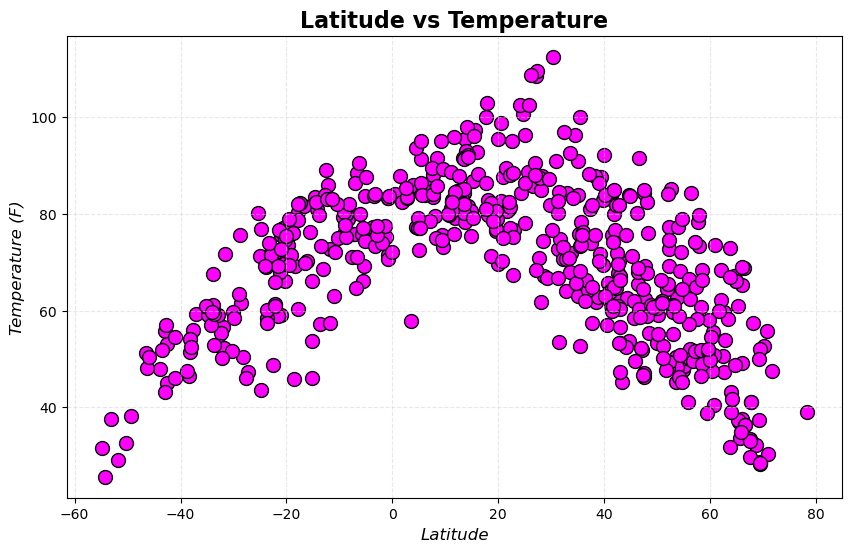

In [78]:
# Build scatter plot for latitude vs. temperature
# scatter latitude vs temperature

# Step 1: Get the Data
x = city_data_df.Lat
y = city_data_df['Max Temp']

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="fuchsia", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Temperature (F)", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)


# Save the figure
plt.savefig("./output_data/Fig1.png")

# Step 5: Show/Save the graph
plt.show()


#### Latitude Vs. Humidity

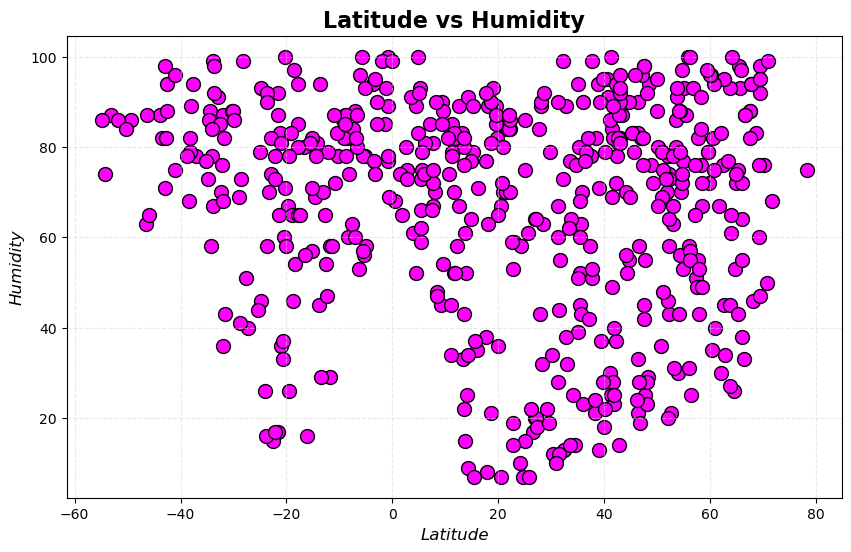

In [79]:
# Build the scatter plots for latitude vs. humidity
# Step 1: Get the Data
x = city_data_df.Lat
y = city_data_df.Humidity

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="fuchsia", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)


# Save the figure
plt.savefig("./output_data/Fig2.png")

# Step 5: Show/Save the graph
plt.show()

#### Latitude Vs. Cloudiness

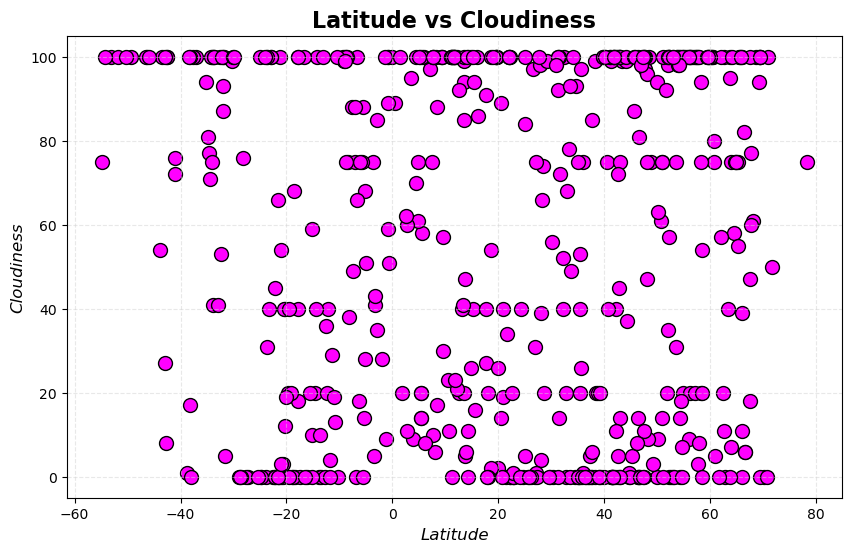

In [80]:
# Build the scatter plots for latitude vs. cloudiness
# Step 1: Get the Data
x = city_data_df.Lat
y = city_data_df.Cloudiness

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="fuchsia", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)


# Save the figure
plt.savefig("./output_data/Fig3.png")

# Step 5: Show/Save the graph
plt.show()

#### Latitude vs. Wind Speed Plot

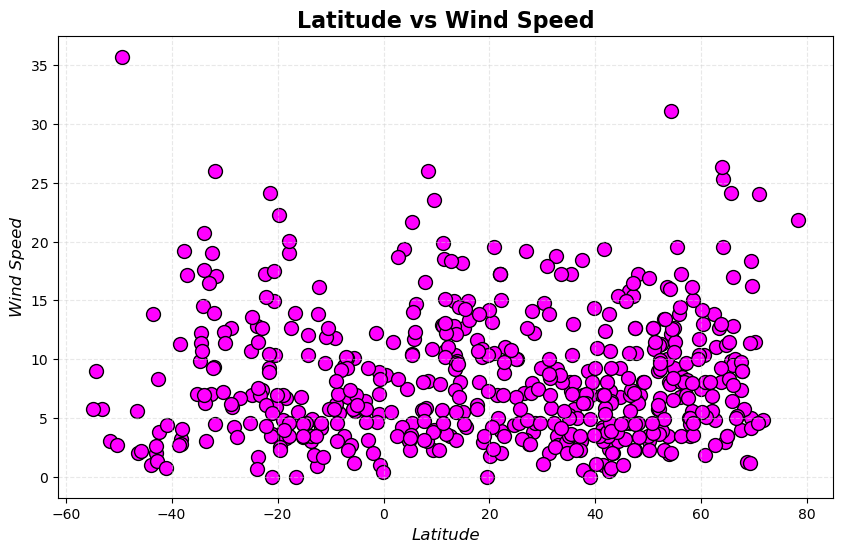

In [81]:
# Build the scatter plots for latitude vs. wind speed
# Step 1: Get the Data
x = city_data_df.Lat
y = city_data_df['Wind Speed']

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="fuchsia", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)


# Save the figure
plt.savefig("./output_data/Fig4.png")

# Step 5: Show/Save the graph
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [82]:
# Define a function to create Linear Regression plots

def doRegression(x_values, y_values, x_title, y_title, annotation_pos):
    # USING LINREGRESS
  
    # makes the line of best fit
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # calculate the predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # make the plot
    # Step 2: Make the canvas
    plt.figure(figsize=(10, 6))
    
    # Step 3: Make the basic plot
    plt.scatter(x_values, y_values, facecolor="fuchsia", edgecolor="black", s=100)
    plt.plot(x_values, regress_values, "r-") # plot the line of best fit
    
    # Step 4: Customizations
    plt.xlabel(x_title, fontsize=12, fontstyle="italic")
    plt.ylabel(y_title, fontsize=12, fontstyle="italic")
    plt.title(f"{x_title} vs {y_title}", fontweight="bold", fontsize=16)
    plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
    
    plt.annotate(line_eq, annotation_pos, fontsize=15, color="red")
    
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [83]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,2,tiksi,71.6872,128.8694,47.43,68.0,50.0,4.83,RU,1.717570e+09
3,4,ribeira grande,38.5167,-28.7000,61.77,82.0,20.0,8.99,PT,1.717570e+09
4,5,akureyri,65.6835,-18.0878,33.73,93.0,100.0,24.16,IS,1.717570e+09
5,6,cabo san lucas,22.8909,-109.9124,76.60,59.0,0.0,11.01,MX,1.717569e+09
7,8,corn island,12.1694,-83.0418,82.51,80.0,100.0,12.93,NI,1.717570e+09


In [84]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,waitangi,-43.9535,-176.5597,47.82,87.0,54.0,1.01,NZ,1.717570e+09
1,1,madang,-5.2246,145.7966,83.66,78.0,28.0,6.42,PG,1.717570e+09
6,7,edinburgh of the seven seas,-37.0676,-12.3116,59.34,78.0,100.0,17.16,SH,1.717570e+09
11,12,blackmans bay,-43.0167,147.3167,55.72,71.0,27.0,1.99,AU,1.717570e+09
12,13,adamstown,-25.0660,-130.1015,71.29,79.0,100.0,10.67,PN,1.717570e+09


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.5407521776614582


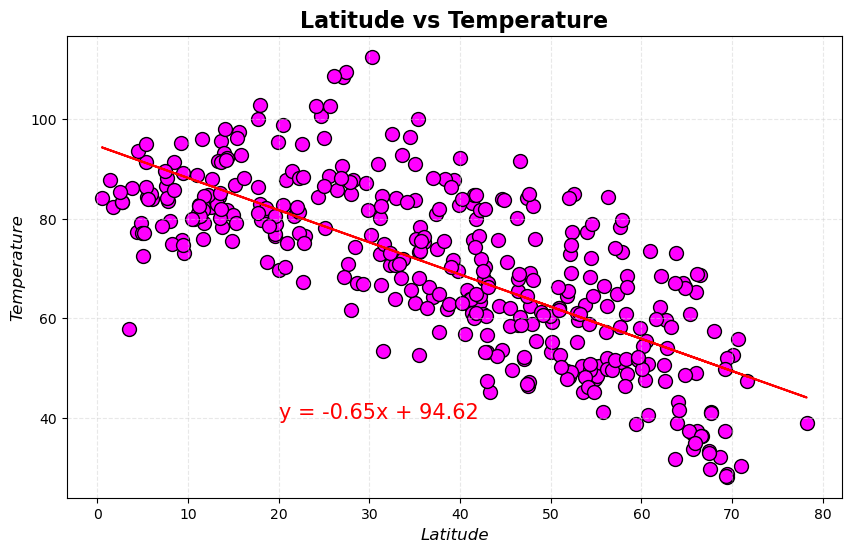

In [85]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Max Temp"]

doRegression(x_values, y_values, "Latitude", "Temperature", (20,40))

The r-squared is: 0.6405217609501533


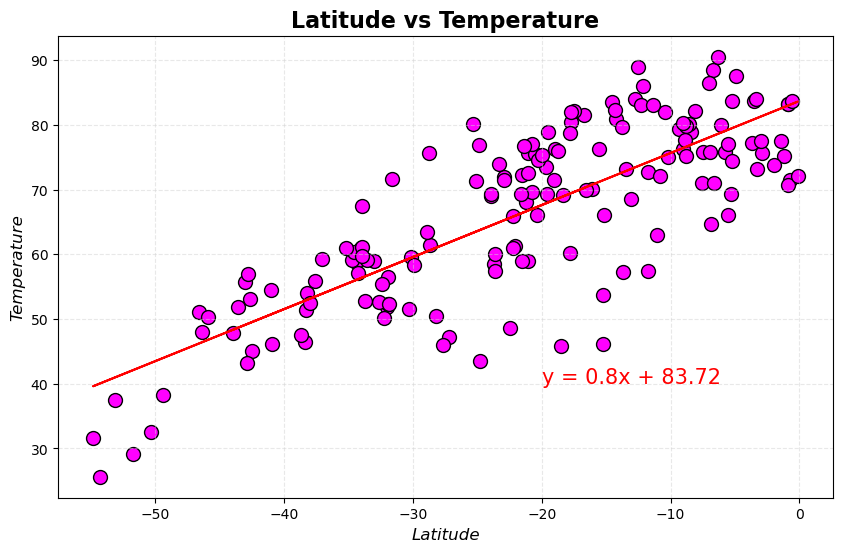

In [86]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Max Temp"]

doRegression(x_values, y_values, "Latitude", "Temperature", (-20,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [87]:
# There is a "fair" linear relationship between latitude and temperature for the northern and southern hemispheres 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.005109010765474837


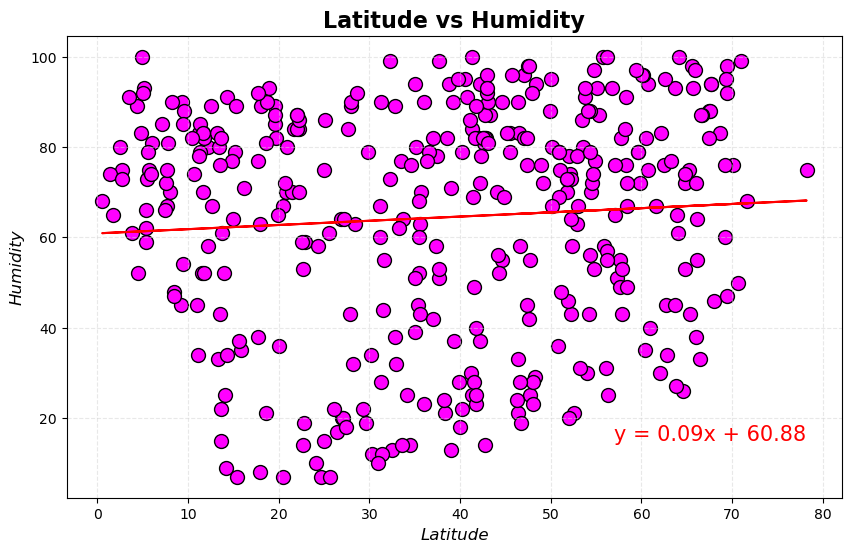

In [88]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Humidity"]

doRegression(x_values, y_values, "Latitude", "Humidity", (57,15))

The r-squared is: 0.002126290638562368


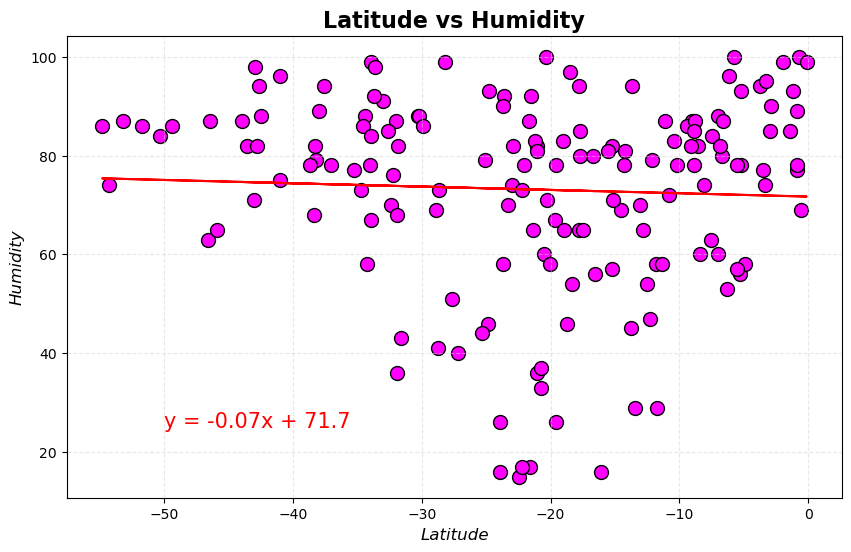

In [89]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Humidity"]

doRegression(x_values, y_values, "Latitude", "Humidity", (-50,25))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [90]:
# There is a "poor" linear relationship between latitude and humidity for the northern and southern hemispheres 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.001768402108518111


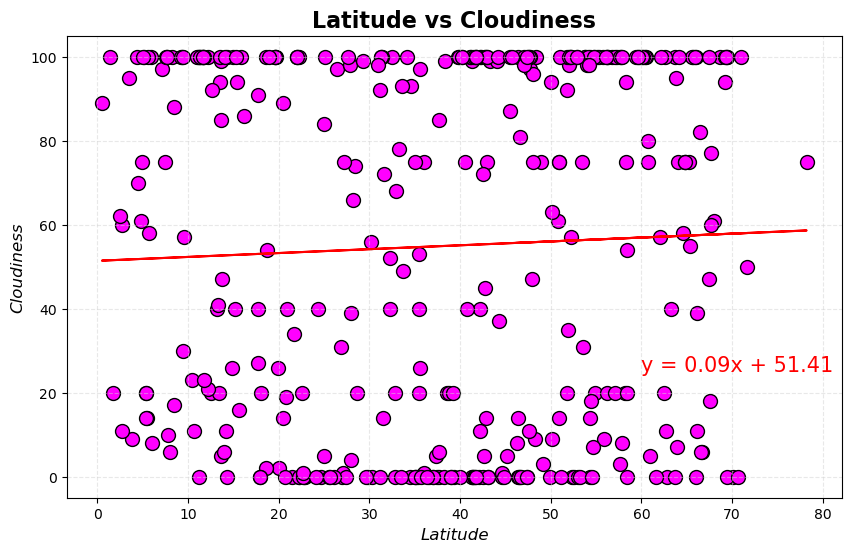

In [91]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Cloudiness"]

doRegression(x_values, y_values, "Latitude", "Cloudiness", (60,25))

The r-squared is: 0.051282886271960294


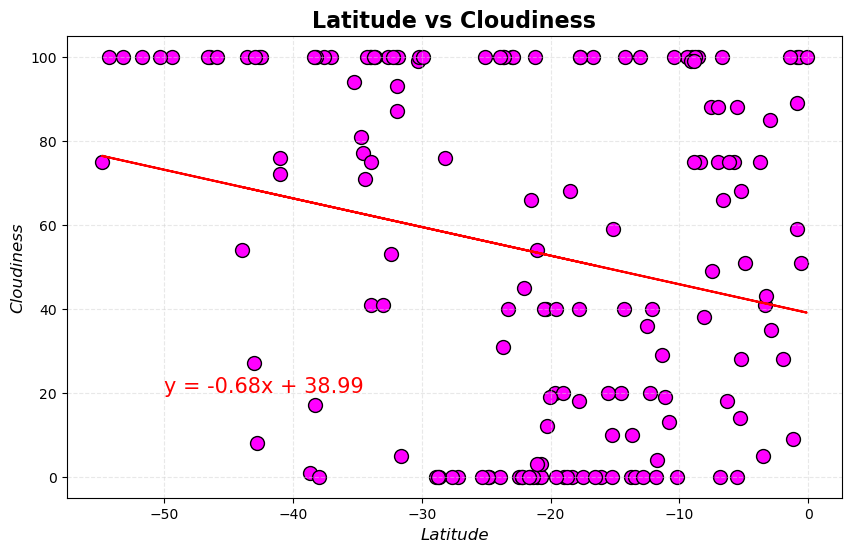

In [92]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Cloudiness"]

doRegression(x_values, y_values, "Latitude", "Cloudiness", (-50,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [93]:
# There is a "poor" linear relationship between latitude and cloudiness for the northern and southern hemispheres 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 2.8867619528282755e-06


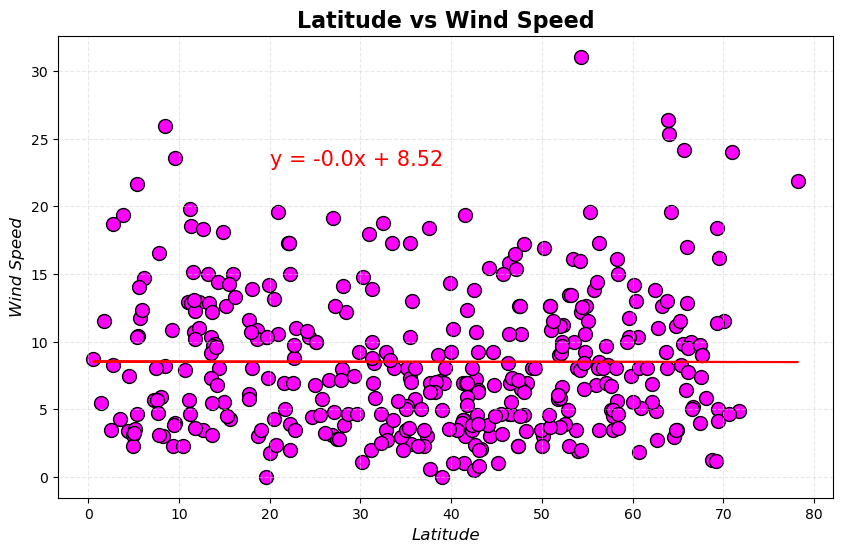

In [94]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Wind Speed"]

doRegression(x_values, y_values, "Latitude", "Wind Speed", (20,23))

The r-squared is: 0.019838450218705526


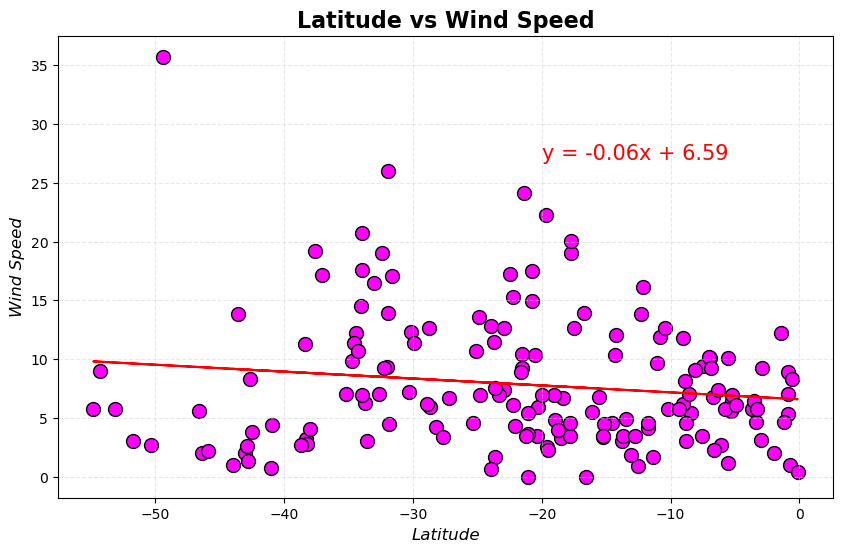

In [95]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Wind Speed"]

doRegression(x_values, y_values, "Latitude", "Wind Speed", (-20,27))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [96]:
# There is a "poor" linear relationship between latitude and wind speed for the northern and southern hemispheres 

In [ ]:
# COMMENTS

# referenced the professors instructional video recordings to help with certain details in the code development. 